# 1.Problem Statement

# Import Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
data = pd.read_csv("/content/stackoverflow_questions_with_body (1).csv")

In [ ]:
data

question_id                                              title  \
0        79643619                                   Face Recognition   
1        79643597  Why do two Python dictionaries initiated by de...   
2        79643566                                 Pandas is_year_end   
3        79643540  How can I remove duplicate assets by serial nu...   
4        79643480  How do I install SSL for python 3.13+ in a AWS...   
...           ...                                                ...   
3995     78209777  UserWarning: RNN module weights are not part o...   
3996     78209363  How to make a neural network with multiple out...   
3997     78208603  Why are the dimension of the weight in torch.n...   
3998     78204360     Upgrading accelerate while using Trainer class   
3999     78202518  Inconsistent OCR Results: Different Prediction...   

                                                   tags  score  creation_date  \
0                              python, face-recognition     -8     1748509412   
1                        python, python-3.x, dictionary      0     1748508524   
2                                        python, pandas      2     1748507235   
3                                           python, csv     -1     1748506250   
4     python, python-3.x, amazon-web-services, amazo...     -4     1748504066   
...                                                 ...    ...            ...   
3995     machine-learning, deep-learning, pytorch, lstm      0     1711169290   
3996     python, deep-learning, pytorch, neural-network      0     1711153727   
3997   machine-learning, matrix, deep-learning, pytorch      0     1711137702   
3998  deep-learning, pytorch, nlp, huggingface-trans...      0     1711088285   
3999  python, machine-learning, deep-learning, pytor...      0     1711051320   

                                                   body  
0     <p>The problem involves developing a program t...  
1     <p>I am using Python 3.12 and wanted to initia...  
2     <p>I am using Python 3.11.3 on Windows and Pan...  
3     <p>I'm cleaning up a basic asset inventory sto...  
4     <p>I am currently trying to install python 3.1...  
...                                                 ...  
3995  <p>Was working on a Siamese LSTM model for cla...  
3996  <p>I am working on a multi-output (i.e &gt; 1 ...  
3997  <p>In the documentation of torch.nn.functional...  
3998  <p>I am facing an issue whilst using Trainer c...  
3999  <p>I'm encountering an issue with my custom OC...  

[4000 rows x 6 columns]

In [ ]:
 data= data[['title', 'body','tags']]


In [ ]:
data

title  \
0                                      Face Recognition   
1     Why do two Python dictionaries initiated by de...   
2                                    Pandas is_year_end   
3     How can I remove duplicate assets by serial nu...   
4     How do I install SSL for python 3.13+ in a AWS...   
...                                                 ...   
3995  UserWarning: RNN module weights are not part o...   
3996  How to make a neural network with multiple out...   
3997  Why are the dimension of the weight in torch.n...   
3998     Upgrading accelerate while using Trainer class   
3999  Inconsistent OCR Results: Different Prediction...   

                                                   body  \
0     <p>The problem involves developing a program t...   
1     <p>I am using Python 3.12 and wanted to initia...   
2     <p>I am using Python 3.11.3 on Windows and Pan...   
3     <p>I'm cleaning up a basic asset inventory sto...   
4     <p>I am currently trying to install python 3.1...   
...                                                 ...   
3995  <p>Was working on a Siamese LSTM model for cla...   
3996  <p>I am working on a multi-output (i.e &gt; 1 ...   
3997  <p>In the documentation of torch.nn.functional...   
3998  <p>I am facing an issue whilst using Trainer c...   
3999  <p>I'm encountering an issue with my custom OC...   

                                                   tags  
0                              python, face-recognition  
1                        python, python-3.x, dictionary  
2                                        python, pandas  
3                                           python, csv  
4     python, python-3.x, amazon-web-services, amazo...  
...                                                 ...  
3995     machine-learning, deep-learning, pytorch, lstm  
3996     python, deep-learning, pytorch, neural-network  
3997   machine-learning, matrix, deep-learning, pytorch  
3998  deep-learning, pytorch, nlp, huggingface-trans...  
3999  python, machine-learning, deep-learning, pytor...  

[4000 rows x 3 columns]

In [ ]:
datac = data.copy()

In [ ]:
datac

title  \
0                                      Face Recognition   
1     Why do two Python dictionaries initiated by de...   
2                                    Pandas is_year_end   
3     How can I remove duplicate assets by serial nu...   
4     How do I install SSL for python 3.13+ in a AWS...   
...                                                 ...   
3995  UserWarning: RNN module weights are not part o...   
3996  How to make a neural network with multiple out...   
3997  Why are the dimension of the weight in torch.n...   
3998     Upgrading accelerate while using Trainer class   
3999  Inconsistent OCR Results: Different Prediction...   

                                                   body  \
0     <p>The problem involves developing a program t...   
1     <p>I am using Python 3.12 and wanted to initia...   
2     <p>I am using Python 3.11.3 on Windows and Pan...   
3     <p>I'm cleaning up a basic asset inventory sto...   
4     <p>I am currently trying to install python 3.1...   
...                                                 ...   
3995  <p>Was working on a Siamese LSTM model for cla...   
3996  <p>I am working on a multi-output (i.e &gt; 1 ...   
3997  <p>In the documentation of torch.nn.functional...   
3998  <p>I am facing an issue whilst using Trainer c...   
3999  <p>I'm encountering an issue with my custom OC...   

                                                   tags  
0                              python, face-recognition  
1                        python, python-3.x, dictionary  
2                                        python, pandas  
3                                           python, csv  
4     python, python-3.x, amazon-web-services, amazo...  
...                                                 ...  
3995     machine-learning, deep-learning, pytorch, lstm  
3996     python, deep-learning, pytorch, neural-network  
3997   machine-learning, matrix, deep-learning, pytorch  
3998  deep-learning, pytorch, nlp, huggingface-trans...  
3999  python, machine-learning, deep-learning, pytor...  

[4000 rows x 3 columns]

# Simple EDA

###  Inspecting Dataframe Structure

In [ ]:
datac.shape

(4000, 3)

In [ ]:
datac.head()

title  \
0                                   Face Recognition   
1  Why do two Python dictionaries initiated by de...   
2                                 Pandas is_year_end   
3  How can I remove duplicate assets by serial nu...   
4  How do I install SSL for python 3.13+ in a AWS...   

                                                body  \
0  <p>The problem involves developing a program t...   
1  <p>I am using Python 3.12 and wanted to initia...   
2  <p>I am using Python 3.11.3 on Windows and Pan...   
3  <p>I'm cleaning up a basic asset inventory sto...   
4  <p>I am currently trying to install python 3.1...   

                                                tags  
0                           python, face-recognition  
1                     python, python-3.x, dictionary  
2                                     python, pandas  
3                                        python, csv  
4  python, python-3.x, amazon-web-services, amazo...

###  Inspecting DataFrame Content

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4000 non-null   object
 1   body    4000 non-null   object
 2   tags    4000 non-null   object
dtypes: object(3)
memory usage: 93.9+ KB


#### Checking for null values

In [ ]:
datac.isnull().sum()

title    0
body     0
tags     0
dtype: int64

#### Checking for duplicates

In [ ]:
datac.duplicated().sum()

np.int64(193)

In [ ]:
#datac[datac.duplicated()]

#### Checking for the presence of tags ,emojis,numbers,links etc.,

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
def simple_EDA(data,column):
    import emoji
    import string

    lower_upper = data[column].apply(lambda x: False if((x.islower()) or (x.isupper())) else True).sum()
    html_xml = data[column].apply(lambda x : True if re.search("<.*?>",x) else False).sum()
    urls = data[column].apply(lambda x: True if re.search("https?://\S+",x) else False).sum()
    emails = data[column].apply(lambda x : True if re.search("\S+@\S+",x) else False).sum()
    mentions = data[column].apply(lambda x : True if re.search("\B[@#]\S+",x) else False).sum()
    emo = data[column].apply(lambda x : True if emoji.emoji_count(x) else False).sum()
    digits = data[column].apply(lambda x : True if re.search("\d+",x) else False).sum()
    punc = data[column].apply(lambda x : True if re.search('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',x) else False).sum()
    dates = data[column].apply(lambda x : True if (re.search(r"\b[0-9]{1,2}\/[0-9]{1,2}\/[0-9]{4}\b",x)) or (re.search(r"\b[0-9]{4}\/[0-9]{1,2}\/[0-9]{1,2}\b",x)) else False).sum()


    if lower_upper > 0:
        print("Have both lower and upper case")
    if html_xml > 0:
        print("Have Tags")
    if urls > 0:
        print("Have urls")
    if emails > 0:
        print("Have emails")
    if mentions > 0:
        print("Have mentions")
    if emo > 0:
        print("Have emojis")
    if digits > 0:
        print("Have digits")
    if punc > 0:
        print("Have Punctuations")
    if dates > 0:
        print("Have dates")

In [ ]:
simple_EDA(datac,"title")

Have both lower and upper case
Have urls
Have emails
Have mentions
Have digits
Have Punctuations


In [ ]:
simple_EDA(datac,"body")

Have both lower and upper case
Have Tags
Have urls
Have emails
Have mentions
Have emojis
Have digits
Have Punctuations
Have dates


In [ ]:
simple_EDA(datac,"tags")

Have digits
Have Punctuations


# Exploratory Data Analysis

### Text Length Analysis

In [ ]:
df = datac.copy()

In [ ]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()

In [ ]:
df['title_len']

0        16
1       144
2        18
3        64
4        60
       ... 
3995     81
3996     88
3997     94
3998     46
3999     75
Name: title_len, Length: 4000, dtype: int64

In [ ]:
df['body_len']

0         698
1        1272
2        1876
3         346
4        1497
        ...  
3995     8442
3996     2552
3997      602
3998      532
3999    19614
Name: body_len, Length: 4000, dtype: int64

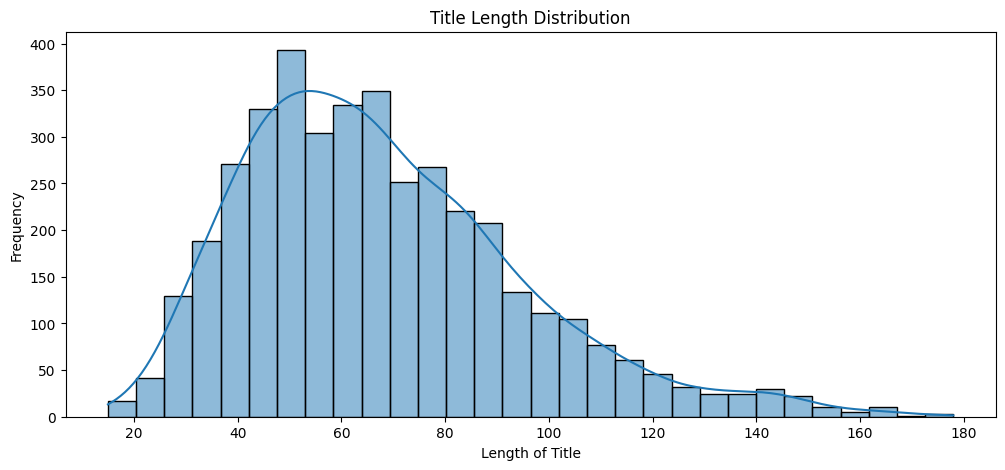

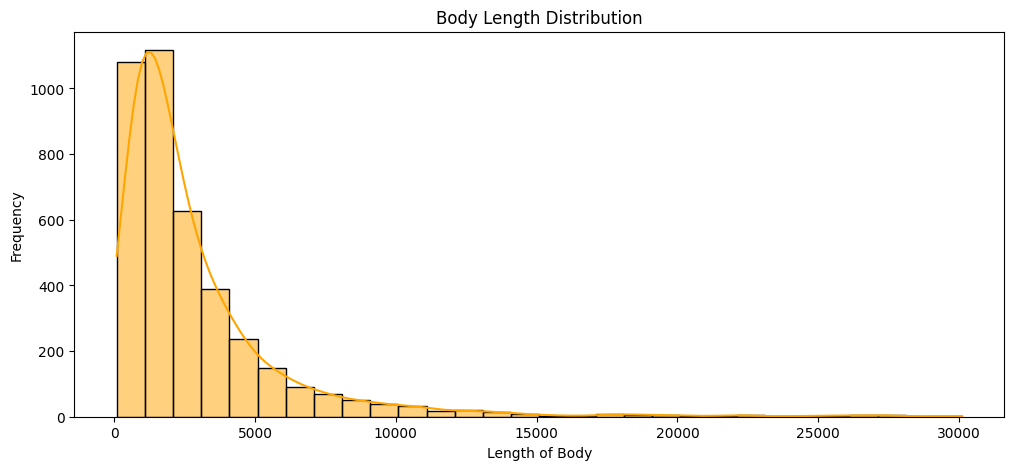

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['title_len'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['body_len'], bins=30, kde=True, color='orange')
plt.title("Body Length Distribution")
plt.xlabel("Length of Body")
plt.ylabel("Frequency")
plt.show()

###  Number of Tags per Question

In [ ]:
df['tags_list'] = df['tags'].str.split(',')
df['num_tags'] = df['tags_list'].apply(len)

In [ ]:
df['tags_list']

0                             [python,  face-recognition]
1                      [python,  python-3.x,  dictionary]
2                                       [python,  pandas]
3                                          [python,  csv]
4       [python,  python-3.x,  amazon-web-services,  a...
                              ...                        
3995    [machine-learning,  deep-learning,  pytorch,  ...
3996    [python,  deep-learning,  pytorch,  neural-net...
3997    [machine-learning,  matrix,  deep-learning,  p...
3998    [deep-learning,  pytorch,  nlp,  huggingface-t...
3999    [python,  machine-learning,  deep-learning,  p...
Name: tags_list, Length: 4000, dtype: object

In [ ]:
df['num_tags']

0       2
1       3
2       2
3       2
4       5
       ..
3995    4
3996    4
3997    4
3998    5
3999    5
Name: num_tags, Length: 4000, dtype: int64

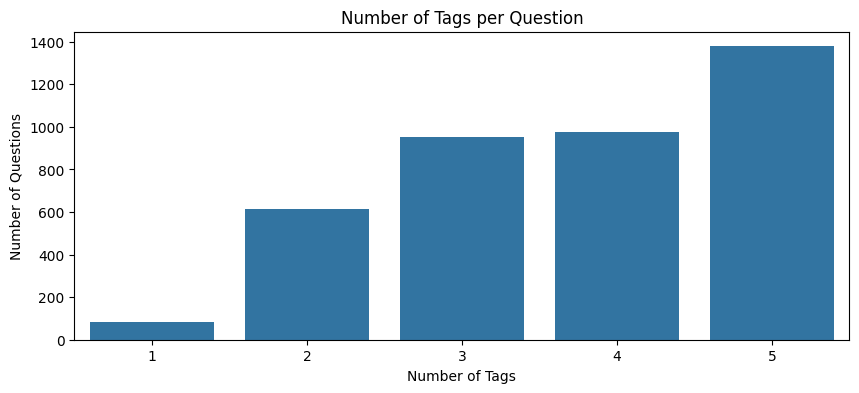

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='num_tags', data=df)
plt.title("Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Questions")
plt.show()

###  Most Frequent Tags

In [ ]:
all_tags = [tag for tags in df['tags_list'] for tag in tags]
tag_counts = pd.DataFrame(Counter(all_tags).most_common(10), columns=['Tag', 'Count'])

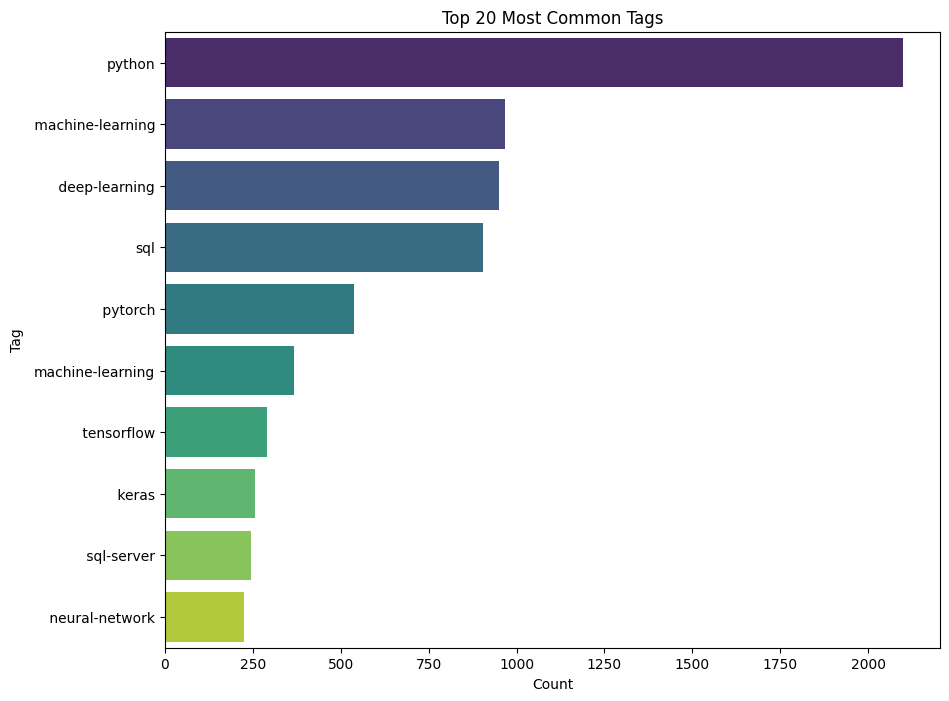

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=tag_counts, palette='viridis')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

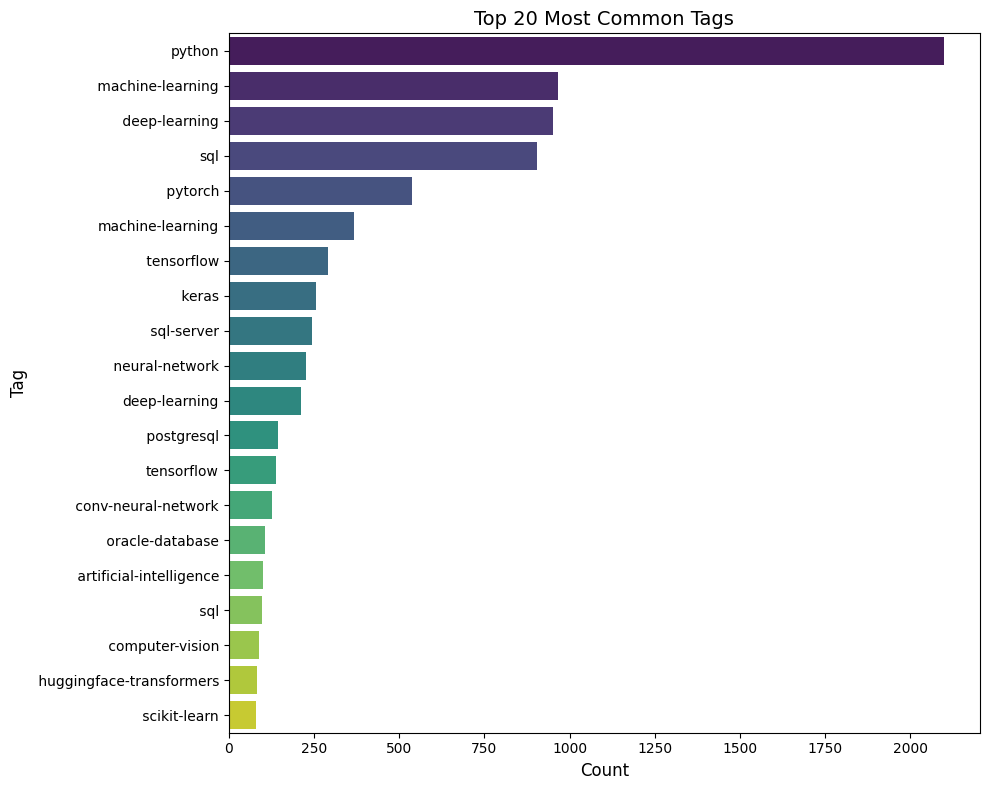

In [ ]:
# Sort the tags by count and take top 20
top_tags = tag_counts.sort_values(by='Count', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=top_tags, palette='viridis')
plt.title("Top 20 Most Common Tags", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Tag", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


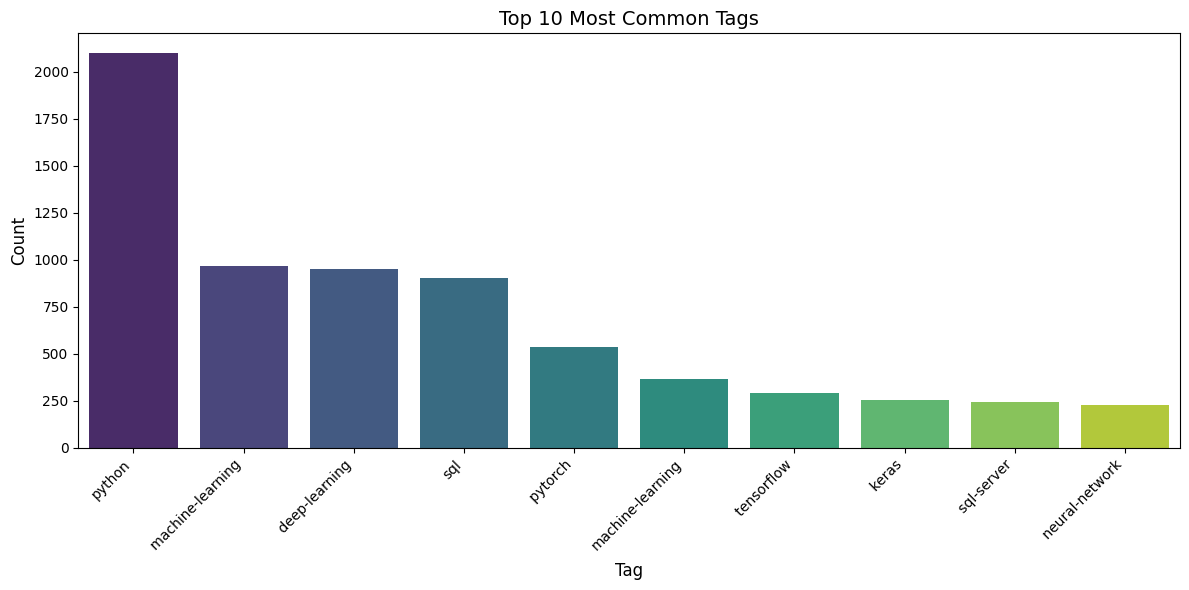

In [ ]:
# Sort and take top 20 tags
top_tags = tag_counts.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Tag', y='Count', data=top_tags, palette='viridis')
plt.title("Top 10 Most Common Tags", fontsize=14)
plt.xlabel("Tag", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


###  Word Cloud for Titles

In [ ]:
title_text = " ".join(df['title'].tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(title_text)

In [ ]:
title_text

'Face Recognition Why do two Python dictionaries initiated by default parameter point to the same object? Shouldn&#39;t the default parameter create a new object? Pandas is_year_end How can I remove duplicate assets by serial number using Python? How do I install SSL for python 3.13+ in a AWS EC2 instance? How can I accurately extract Korean text from image-based PDFs for use with LLMs? How to stop a code using CTRL C in python using scapy Why does calling instance methods through class name need explicit self? Why do I get different results and types when accessing unmasked elements of a NumPy MaskedArray in different ways? I got Excel 2024 &amp; xlwings (open source) installed and working fine. Want to use UDFs from python in .xlsx file How do I create thread-safe asyncio background tasks? How to get power shell output from python Selenium Click Intercepted by ui-widget-overlay Despite Removing Overlay and Modal Can I index class types in a Python list? Error creating PyInstaller exe

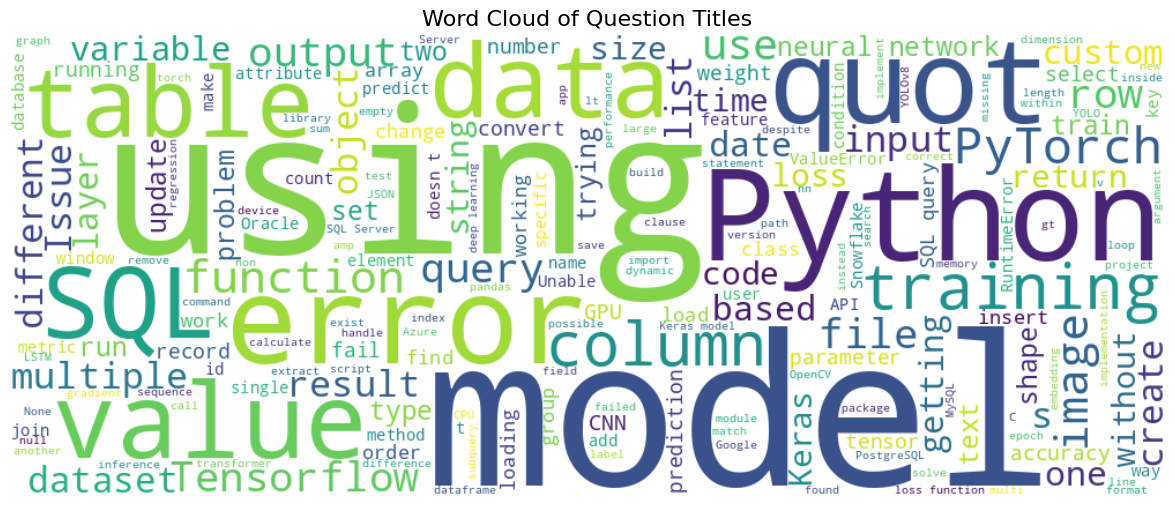

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Titles", fontsize=16)
plt.show()

### Word Cloud for Body

In [ ]:
body_text = " ".join(df['body'].sample(1000).tolist())  # Sample for performance
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(body_text)

In [ ]:
body_text

'<p>I\'m using an <a href="https://docs.ultralytics.com/guides/object-counting/" rel="nofollow noreferrer">example from Ultralytics (YOLOv11)</a> to count apples on a conveyor belt. It defines a line across the frame and counts how many apples cross that line using the <strong>ObjectCounter</strong> solution provided by Ultralytics.</p>\n<p>Here is a the original code:</p>\n<pre><code>import cv2\n\nfrom ultralytics import solutions\n\ncap = cv2.VideoCapture(&quot;path/to/video.mp4&quot;)\nassert cap.isOpened(), &quot;Error reading video file&quot;\n\nregion_points = [(20, 400), (1080, 400)]  # line counting\n\n# Video writer\nw, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))\nvideo_writer = cv2.VideoWriter(&quot;object_counting_output.avi&quot;, cv2.VideoWriter_fourcc(*&quot;mp4v&quot;), fps, (w, h))\n\n# Initialize object counter object\ncounter = solutions.ObjectCounter(\n    show=True,  # display the output\n    region=reg

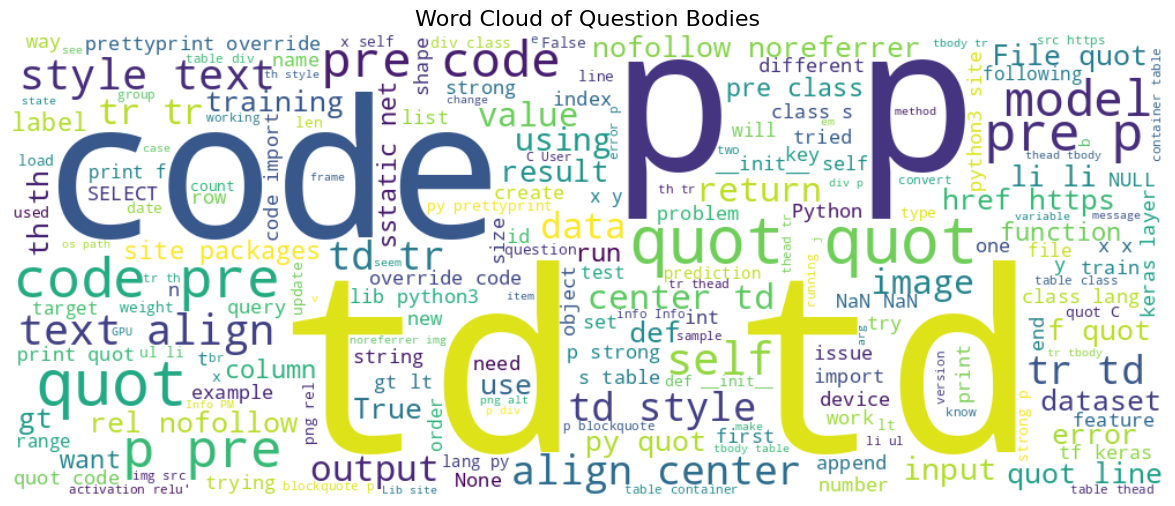

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Bodies", fontsize=16)
plt.show()

###  Tags vs. Title/Body Length

In [ ]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()
df['tags_list'] = df['tags'].str.split(',')
df['num_tags'] = df['tags_list'].apply(len)

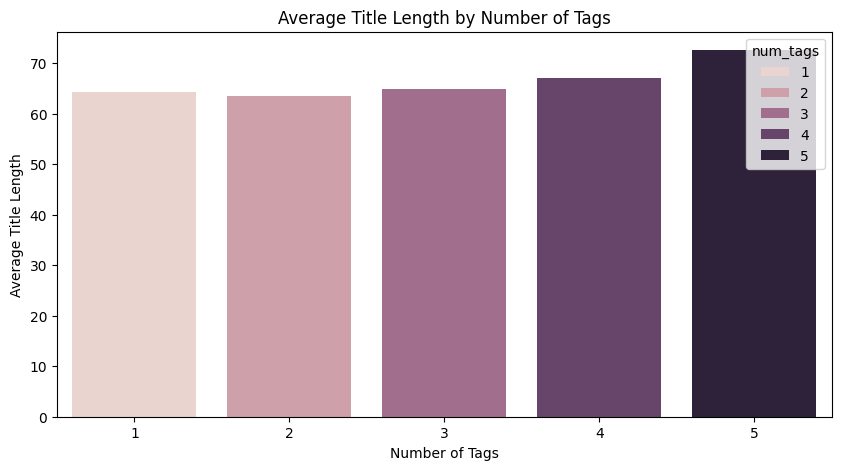

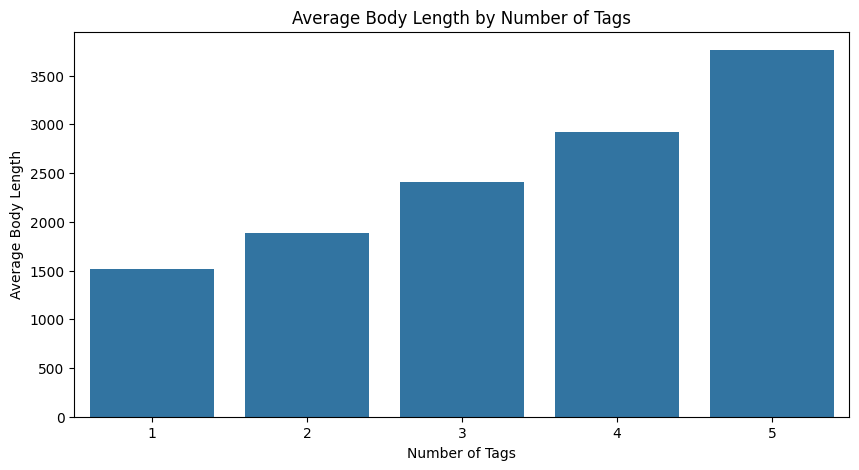

In [ ]:
title_avg = df.groupby('num_tags')['title_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='title_len', data=title_avg,hue ='num_tags' )
plt.title("Average Title Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Title Length")
plt.show()

body_avg = df.groupby('num_tags')['body_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='body_len', data=body_avg )
plt.title("Average Body Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Body Length")
plt.show()

# Data Preprocessing

###  Preprocessing of Data (i.e removing stopwords ,tags,urls etc.,)

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 13.7 MB/s eta 0:00:00


In [ ]:
def pre_processing(data, column, case = "lower", tags = True, urls = True, emails = True, mentions = True, digits = True, dates = True, emojis = True, contractionss = True, stop_words = True, stems = "porter", inflected = "stem", punctuations = True):

    import re
    import emoji
    import contractions
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
    import string

    ps = PorterStemmer()
    sn = SnowballStemmer(language = "english")
    ls = LancasterStemmer()
    wl = WordNetLemmatizer()

    # Stopwords creation
    stp = stopwords.words("english")
    stp.remove("not")

    acronyms = {"gm": "good morning", "gn": "good night", "omg": "oh my god", "mrng": "morning"}

    # Emoji
    if emojis == True:
        data[column] = data[column].apply(lambda x: emoji.demojize(x, delimiters=("", "")))
    else:
        pass

    # Cases
    if case == "lower":
        data[column] = data[column].str.lower()
    elif case == "upper":
        data[column] = data[column].str.upper()
    else:
        pass

    # Tags
    if tags == True:
        data[column] = data[column].apply(lambda x: re.sub("<.*?>", " ", x))
    else:
        pass

    # URLs
    if urls == True:
        data[column] = data[column].apply(lambda x: re.sub(r"http[s]?://+\S+", " ", x))
    else:
        pass

    # Emails
    if emails == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\S+@\S+", " ", x))
    else:
        pass

    # Mentions and Hashtags
    if mentions == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\B[@#]\S+", " ", x))
    else:
        pass

    # Digits
    if digits == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\d", " ", x))
    else:
        pass

    # Dates
    if dates == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\b[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}\b", " ", x))
        data[column] = data[column].apply(lambda x: re.sub(r"\b[0-9]{4}/[0-9]{1,2}/[0-9]{1,2}\b", " ", x))
    else:
        pass

    # Contractions
    if contractionss == True:
        data[column] = data[column].apply(lambda x: contractions.fix(x))
    else:
        pass

    # Stopwords
    if stop_words == True:
        l2 = []
        for doc in data[column]:  # Looping through docs
            l1 = []
            for word in word_tokenize(doc):  # Looping through words
                if word not in stp:  # Checking word is present or not
                    l1.append(word)
            l2.append(" ".join(l1))
        data[column] = l2
    else:
        pass

    # Stemming and Lemmatization
    if inflected == "stem":
        s2 = []
        for doc in data[column]:
            s1 = []
            for word in word_tokenize(doc):
                if stems == "porter":
                    s1.append(ps.stem(word))
                elif stems == "snowball":
                    s1.append(sn.stem(word))
                elif stems == "lancaster":
                    s1.append(ls.stem(word))
            s2.append(" ".join(s1))
        data[column] = s2
    elif inflected == "lemma":
        s4 = []
        for doc in data[column]:
            s3 = []
            for word in word_tokenize(doc):
                s3.append(wl.lemmatize(word))
            s4.append(" ".join(s3))
        data[column] = s4
    else:
        pass

    # Punctuations
    if punctuations == True:
        data[column] = data[column].apply(lambda x: re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', " ", x))
    else:
        pass

    return data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
datac = pre_processing(datac,"title")

In [ ]:
datac

title  \
0                                         face recognit   
1     two python dictionari initi default paramet po...   
2                                     panda is year end   
3         remov duplic asset serial number use python     
4                 instal ssl python     aw ec instanc     
...                                                 ...   
3995  userwarn   rnn modul weight not part singl con...   
3996  make neural network multipl output   multipl c...   
3997  dimens weight torch nn functional linear      ...   
3998                   upgrad acceler use trainer class   
3999   inconsist ocr result   differ predict train test   

                                                   body  \
0     <p>The problem involves developing a program t...   
1     <p>I am using Python 3.12 and wanted to initia...   
2     <p>I am using Python 3.11.3 on Windows and Pan...   
3     <p>I'm cleaning up a basic asset inventory sto...   
4     <p>I am currently trying to install python 3.1...   
...                                                 ...   
3995  <p>Was working on a Siamese LSTM model for cla...   
3996  <p>I am working on a multi-output (i.e &gt; 1 ...   
3997  <p>In the documentation of torch.nn.functional...   
3998  <p>I am facing an issue whilst using Trainer c...   
3999  <p>I'm encountering an issue with my custom OC...   

                                                   tags  
0                              python, face-recognition  
1                        python, python-3.x, dictionary  
2                                        python, pandas  
3                                           python, csv  
4     python, python-3.x, amazon-web-services, amazo...  
...                                                 ...  
3995     machine-learning, deep-learning, pytorch, lstm  
3996     python, deep-learning, pytorch, neural-network  
3997   machine-learning, matrix, deep-learning, pytorch  
3998  deep-learning, pytorch, nlp, huggingface-trans...  
3999  python, machine-learning, deep-learning, pytor...  

[4000 rows x 3 columns]

In [ ]:
datac = pre_processing(datac,"body")

In [ ]:
datac

title  \
0                                         face recognit   
1     two python dictionari initi default paramet po...   
2                                     panda is year end   
3         remov duplic asset serial number use python     
4                 instal ssl python     aw ec instanc     
...                                                 ...   
3995  userwarn   rnn modul weight not part singl con...   
3996  make neural network multipl output   multipl c...   
3997  dimens weight torch nn functional linear      ...   
3998                   upgrad acceler use trainer class   
3999   inconsist ocr result   differ predict train test   

                                                   body  \
0     problem involv develop program allow student u...   
1     use python   want initi dictionari pass valu  ...   
2     use python     window panda       code datetim...   
3     clean basic asset inventori store csv file   r...   
4     current tri instal python     aw ec instanc   ...   
...                                                 ...   
3995  work siames lstm model classif   undertook pro...   
3996  work multi output   i e   gt   output target  ...   
3997  document torch nn functional linear       dime...   
3998  face issu whilst use trainer class pytorch goo...   
3999  encount issu custom ocr   optic charact recogn...   

                                                   tags  
0                              python, face-recognition  
1                        python, python-3.x, dictionary  
2                                        python, pandas  
3                                           python, csv  
4     python, python-3.x, amazon-web-services, amazo...  
...                                                 ...  
3995     machine-learning, deep-learning, pytorch, lstm  
3996     python, deep-learning, pytorch, neural-network  
3997   machine-learning, matrix, deep-learning, pytorch  
3998  deep-learning, pytorch, nlp, huggingface-trans...  
3999  python, machine-learning, deep-learning, pytor...  

[4000 rows x 3 columns]

In [ ]:
datac["tags"] = datac["tags"].apply(lambda x : x.split())

In [ ]:
datac

title  \
0                                         face recognit   
1     two python dictionari initi default paramet po...   
2                                     panda is year end   
3         remov duplic asset serial number use python     
4                 instal ssl python     aw ec instanc     
...                                                 ...   
3995  userwarn   rnn modul weight not part singl con...   
3996  make neural network multipl output   multipl c...   
3997  dimens weight torch nn functional linear      ...   
3998                   upgrad acceler use trainer class   
3999   inconsist ocr result   differ predict train test   

                                                   body  \
0     problem involv develop program allow student u...   
1     use python   want initi dictionari pass valu  ...   
2     use python     window panda       code datetim...   
3     clean basic asset inventori store csv file   r...   
4     current tri instal python     aw ec instanc   ...   
...                                                 ...   
3995  work siames lstm model classif   undertook pro...   
3996  work multi output   i e   gt   output target  ...   
3997  document torch nn functional linear       dime...   
3998  face issu whilst use trainer class pytorch goo...   
3999  encount issu custom ocr   optic charact recogn...   

                                                   tags  
0                           [python,, face-recognition]  
1                    [python,, python-3.x,, dictionary]  
2                                     [python,, pandas]  
3                                        [python,, csv]  
4     [python,, python-3.x,, amazon-web-services,, a...  
...                                                 ...  
3995  [machine-learning,, deep-learning,, pytorch,, ...  
3996  [python,, deep-learning,, pytorch,, neural-net...  
3997  [machine-learning,, matrix,, deep-learning,, p...  
3998  [deep-learning,, pytorch,, nlp,, huggingface-t...  
3999  [python,, machine-learning,, deep-learning,, p...  

[4000 rows x 3 columns]

In [ ]:
datac["tags"] = datac["tags"].apply(lambda x : [item.strip(",") for item in x])

In [ ]:
datac

title  \
0                                         face recognit   
1     two python dictionari initi default paramet po...   
2                                     panda is year end   
3         remov duplic asset serial number use python     
4                 instal ssl python     aw ec instanc     
...                                                 ...   
3995  userwarn   rnn modul weight not part singl con...   
3996  make neural network multipl output   multipl c...   
3997  dimens weight torch nn functional linear      ...   
3998                   upgrad acceler use trainer class   
3999   inconsist ocr result   differ predict train test   

                                                   body  \
0     problem involv develop program allow student u...   
1     use python   want initi dictionari pass valu  ...   
2     use python     window panda       code datetim...   
3     clean basic asset inventori store csv file   r...   
4     current tri instal python     aw ec instanc   ...   
...                                                 ...   
3995  work siames lstm model classif   undertook pro...   
3996  work multi output   i e   gt   output target  ...   
3997  document torch nn functional linear       dime...   
3998  face issu whilst use trainer class pytorch goo...   
3999  encount issu custom ocr   optic charact recogn...   

                                                   tags  
0                            [python, face-recognition]  
1                      [python, python-3.x, dictionary]  
2                                      [python, pandas]  
3                                         [python, csv]  
4     [python, python-3.x, amazon-web-services, amaz...  
...                                                 ...  
3995   [machine-learning, deep-learning, pytorch, lstm]  
3996   [python, deep-learning, pytorch, neural-network]  
3997  [machine-learning, matrix, deep-learning, pyto...  
3998  [deep-learning, pytorch, nlp, huggingface-tran...  
3999  [python, machine-learning, deep-learning, pyto...  

[4000 rows x 3 columns]

###  Numerical Representation of Features and Class Lables

In [ ]:
datac['combined_text'] = datac['title'] + ' ' + datac['body']


X = datac['combined_text']
y = datac['tags']

In [ ]:
X

0       face recognit problem involv develop program a...
1       two python dictionari initi default paramet po...
2       panda is year end use python     window panda ...
3       remov duplic asset serial number use python   ...
4       instal ssl python     aw ec instanc   current ...
                              ...                        
3995    userwarn   rnn modul weight not part singl con...
3996    make neural network multipl output   multipl c...
3997    dimens weight torch nn functional linear      ...
3998    upgrad acceler use trainer class face issu whi...
3999    inconsist ocr result   differ predict train te...
Name: combined_text, Length: 4000, dtype: object

In [ ]:
# Split into train and test
X_train_text, X_test_text, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(X_train_text)

In [ ]:
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y_train_labels)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

In [ ]:
model.fit(X_vec, y_bin)

MLPClassifier(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
subset_acc = accuracy_score(y_test_bin, y_pred)
subset_acc

0.16125

In [ ]:
import pickle


with open("model12.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf12.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("mlb12.pkl", "wb") as f:
    pickle.dump(mlb, f)

In [ ]:
print(datac.iloc[0,1])

problem involv develop program allow student use comput  s webcam captur imag face display preview captur imag   applic provid live video feed webcam   enabl student take snapshot   show captur imag separ window review   function use identif   registr   verif purpos   option   program may includ featur like retak photo   save imag   basic imag valid   e g     ensur face present       enter imag descript  
